Discrepancy Analysis of Charter Index Data from 1999 to 2016

'''This script analyzes discrepancies in charter index data from 1999 to 2016 and across states in the U.S. The goal is to determine the particular places and times in which discrepancies in charter identifiers take place.'''

Author: Brian Lei
Project Lead: Jaren Haber
Project Title: 'Stratification through organizational identity: Do charter schools' ideologies reinforce social inequalities?'

Date Created: July 9, 2018
Date Last Revised: July 11, 2018
Institution: University of California, Berkeley

In [1]:
% matplotlib inline
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_prefix = '/home/jovyan/work/'
df_csch = pd.read_csv(dir_prefix + "pub_schools_merged_2015.csv", encoding = "latin1")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2871: DtypeWarning: Columns (0,2,3,5,7,9,10,11,12,13,17,18,19,20,21,25,26,28,29,30,31,32,33,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,343,344,345,346,347,348,349,350,352,353,354,355,356,359,360,361,362,363,364,365,366,367,368,370,371,372,373,374,376,377,378,379,380,381,382,383,385,386,388,389,391,392,394,395,397,398,400,401,403,404,406,407,409,410,412,413,415,416,418,419,421,422,423,424,426,428,429,431,433,434,436,438,439,441,442,443,445,449,451,452,453,457,458,459,460,461,463,465,467,473,474,475,477,483) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
p = re.compile('RECON.*')
recon_indices = list(filter(p.match,list(df_csch)))
recon_indices

['RECON_STATUS',
 'RECONSTY10',
 'RECONSTF10',
 'RECONSTY11',
 'RECONSTF11',
 'RECONSTY12',
 'RECONSTF12',
 'RECONSTY13',
 'RECONSTF13',
 'RECON_STATUS15',
 'RECON_STATUS16']

In [4]:
#need 0.17
pd.__version__

'0.19.2'

In [5]:
# drop '98 column because of its lack of data
df_csch.drop(['CHARTR98'], axis = 1, inplace = True)
# filter out useful columns and make charter index variable names consistent
df_csch = df_csch.filter(regex=(r'SCHNAM16|NCESSCH|ADDRESS.*|CHARTR.*|CHARTER_TEXT.*|LSTATE16'))
new_names = {'CHARTER_TEXT':'CHARTR14', 'CHARTER_TEXT15':'CHARTR15', 'CHARTER_TEXT16':'CHARTR16'}
df_csch.rename(columns=new_names, inplace=True)
# reorder columns from '99 to'16
cols = list(df_csch)
cols.remove('CHARTR14')
cols.insert(16,'CHARTR14')
df_csch = df_csch[cols]

In [6]:
# use regex to get charter index columns
p = re.compile('CHARTR.*|CHARTER_TEXT.*')
charter_indices = list(filter(p.match,list(df_csch)))

In [7]:
'''
Chartr14-16 have 'yes' and 'no' for charter status and are changed to 1s and 2s to be consistent with the chartr99-13
They also have mixed value types. Since '1.0' != 1 or '1' != '1.0' this could be an issue for determining discrepancy between consecutive
years using == comparison
'''
df_csch['CHARTR10'].value_counts()
di = {"Yes": 1, "No" : 2}
df_csch[['CHARTR14','CHARTR15','CHARTR16']]=df_csch[['CHARTR14','CHARTR15','CHARTR16']].replace(di)

In [8]:
# turned to 1s and 2s
df_csch['CHARTR14'].value_counts()

2                 88182
1                  7288
Not Applicable     6931
Name: CHARTR14, dtype: int64

In [9]:
# turn all data to numeric using to_numeric, 'coerce' forces changes despite mixed types but turns non convertible values to NaN
df_csch[charter_indices] = df_csch[charter_indices].apply(pd.to_numeric,errors = 'coerce')
df_csch[charter_indices] = df_csch[charter_indices].fillna(0) #turns NaN to 0 to allow for comparison(since NaN != NaN)
df_csch['CHARTR10'].value_counts()

2.0    85740
0.0    45354
1.0     5731
Name: CHARTR10, dtype: int64

In [10]:
df_csch['CHARTR14'].value_counts()

2.0    88182
0.0    41355
1.0     7288
Name: CHARTR14, dtype: int64

In [11]:
df_csch[charter_indices] # what the data looks like now

,CHARTR99,CHARTR00,CHARTR01,CHARTR02,CHARTR03,CHARTR04,CHARTR05,CHARTR06,CHARTR07,CHARTR08,CHARTR09,CHARTR10,CHARTR11,CHARTR12,CHARTR13,CHARTR14,CHARTR15,CHARTR16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
1,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
3,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
4,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
6,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
7,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
8,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
9,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0


In [12]:
# create 'info' and 'num_charter' columns which tell us the number of years where there is charter index data ('yes or 'no') and
# the number of years where a school is positively identified as charter respectively
df_csch['index_sum'] = df_csch[charter_indices].sum(axis=1)
mask = df_csch[charter_indices] == 0 # could be useful for determining years with charter data

df_csch['info'] = 18 - mask.sum(axis=1)
df_csch['num_charter'] = 2*df_csch['info'] - df_csch['index_sum'] # works because 'yes' is 1 and 'no' is 2 and no data is 0
df_csch['percent_charter'] = df_csch['num_charter']/df_csch['info']

In [13]:
# create a column 'charter_history' that could be useful for analayzing discrepancies in charter history for non-consecutive years
l = df_csch[charter_indices].values.tolist() # full charter history in  nested list
l = [[b for b in a if b != 0] for a in l] # filter out 0s(years with no data)
df_csch['charter_history'] = pd.Series(l, index=df_csch.index)

In [14]:
df_csch['charter_history'] # charter_history gives history of all yes or no (ignores years with 'm'/'n' values)

0                        [2.0, 2.0, 2.0]
1         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
2                        [2.0, 2.0, 2.0]
3         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
4         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
5                        [2.0, 2.0, 2.0]
6         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
7         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
8         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
9         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
10        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
11                       [2.0, 2.0, 2.0]
12        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
13        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
14        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
15        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
16             [2.0, 2.0, 2.0, 2.0, 2.0]
17        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
18                       [2.0, 2.0, 2.0]
19        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
20        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
21        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
22        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
23        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
24              

In [15]:
df_csch['info'].describe()

count    136825.000000
mean         12.014493
std           6.528556
min           0.000000
25%           6.000000
50%          15.000000
75%          18.000000
max          18.000000
Name: info, dtype: float64

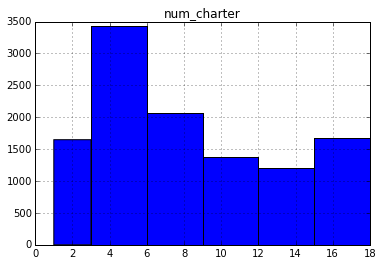

In [16]:
# bins [1,3), [3,6),....,[12,15), [15,18] represent number of years positively identified as charter
# height represents number of schools
df_csch.hist(column='num_charter', bins = [1,3,6,9,12,15,18])
plt.show()

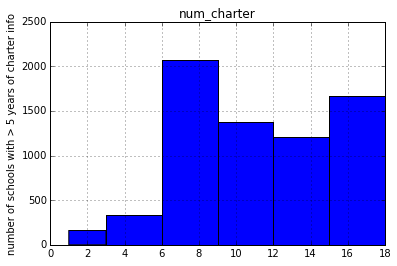

In [17]:
# same histogram using only schools with charter info(not 'missing' or 'n/a') for > 5 years(5 is arbitrary, could be any number) 
df_csch[df_csch['info'] > 5].hist(column='num_charter', bins = [1,3,6,9,12,15,18])
plt.ylabel('number of schools with > 5 years of charter info')
plt.show()

In [18]:
'''
Create '(yr#)type', and 'yr#' columns are discrepancy type (with following year) and discrepancy indicator(true meaning there is a discrepancy)
False(type 1) corresponds to n/a / missing data -> yes or no(or vice versa) 
True(type 2) corresponds to yes -> no(or vice versa) 
'''
c = 'CHARTR'
disc_ind = []
disc_type = []
for x in charter_indices:
    year = int(x[-2:])
    if year != 16:
        disc_ind.append(str(year))
        disc_type.append(str(year) + 'type')
        nxt_yr = c + ('%02d' % (year + 1))[-2:]
        df_csch[str(year)] = ~(df_csch[c + x[-2:]] == df_csch[nxt_yr])
        df_csch[str(year) + 'type'] = df_csch[str(year)] & (df_csch[c + x[-2:]] != 0) & (df_csch[nxt_yr] != 0)

In [19]:
# add column for number of discrepancies and number of each type of discrepancy 
df_csch['num_dis'] = df_csch[disc_ind].sum(axis = 1)
df_csch['type2_dis'] = df_csch[disc_type].sum(axis = 1)
df_csch['type1_dis'] = df_csch['num_dis'] - df_csch['type2_dis']

In [20]:
# type2 distribution
df_csch['type2_dis'].value_counts()

0    135457
1       963
2       360
3        38
4         6
5         1
Name: type2_dis, dtype: int64

In [21]:
# criterion 1: majority of years with data indicated charter
df_csch['crit1'] = df_csch['percent_charter']>.5

In [27]:
# criterion 2: positively indicated as charter in 2016 (simply 'CHARTR16' == 1)
# criterion 3: no info in 2016, has at least 3 years of info, and last 3 years with info indicated charter
# note the inequalities applied to charter_history are true because the only values that can appear are 2s and 1s.
df_csch['crit3'] = (df_csch['CHARTR16']==0) & (df_csch['info'] >= 3) & (df_csch['charter_history'].apply(lambda x: sum(x[-3:])==3))

# criterion 4: has at least 4 years of info and >2 years of the last 4 indicated charter
df_csch['crit4'] = (df_csch['info'] >= 4) & (df_csch['charter_history'].apply(lambda x: sum(x[-4:])<6))

# Check if any of the criteria are met. Add additiional check for 'info' > 0 for 'percent_charter' calculations
df_csch['CHARTER'] = (df_csch['info'] > 0) & (df_csch['crit1'] | (df_csch['CHARTR16']==1) | df_csch['crit3'] | df_csch['crit4'])

In [28]:
df_csch['CHARTER'].value_counts()

False    125791
True      11034
Name: CHARTER, dtype: int64

Explanation/Reasoning for Criteria

crit1-4 are the criteria used to determine whether or not a school is charter. Only one is needed for the school to designated as charter. The following are assumptions, implications, pros, and cons for each criterion.

crit1: 
pro: allows for us to cut down most of the schools by simply checking if the majority of the years with charter data indicated charter (to see why this works see charter_percent distribution below). 

con: doesn't account for possible streaks of 'yes' at the end of the charter history (the schools could have < .5 yes but have streaks of > 3 yes at the end)

crit2: 
assumption: the most recent year has the most accurate data

con: similar to crit1 in that it does not account for possible streaks of 'no's before 2016

crit3: 
reasoning: if the school has no info for 2016 then we check if the previous 3 years indicated charter. 

along with crit2 implies that if the school had 'no' charter status in 2016 then it is not a charter(once again this depends on the 2016 having the most accurate data). 

assumption: if the school has < 3 years of data then crit1 should be sufficient

crit4: 
reasoning: handles cases where there are >3 years of info more specifically.

assumption: if there are < 4 years of info, then crit3 and crit1 should be sufficient

Brainstorming Code

In [29]:
disc_schools = df_csch[(df_csch['num_charter']>=1) & (df_csch['percent_charter']<.5) & (df_csch['CHARTR16']==1)]
mask2 = disc_schools[['CHARTR12','CHARTR13','CHARTR14','CHARTR15']] == 0

((2*(4 - mask2.sum(axis=1))-(disc_schools[['CHARTR12','CHARTR13','CHARTR14','CHARTR15']]).sum(axis=1))>=2).sum(axis=0) 

141

In [30]:
len(df_csch[(df_csch['num_charter']>=1) & (df_csch['percent_charter']<.5) & (df_csch['CHARTR16']==1)])

167

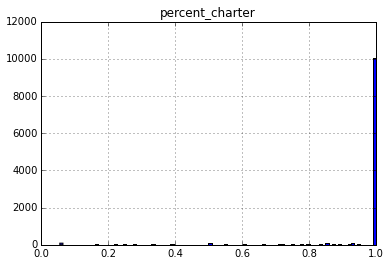

In [31]:
df_csch[df_csch['num_charter']>=1].hist(column='percent_charter', bins = 100)
plt.show()

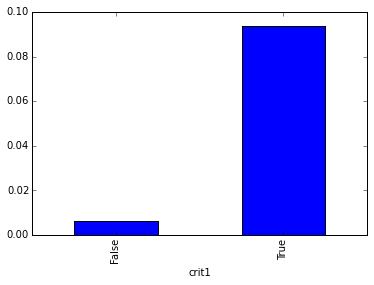

In [33]:
df_csch.groupby('crit1')['type2_dis'].mean().plot(kind = 'bar')

Results/Graphs

In [37]:
dis_graph = df_csch[disc_ind].sum(axis = 0) # number of discrepancies for each year
type2_graph = df_csch[disc_type].sum(axis = 0) # same except counting only type 2 discrepancies
type2_graph.index = type2_graph.index.str.replace('type', '') # renaming index to be the same as dis_graph (99 - 15)

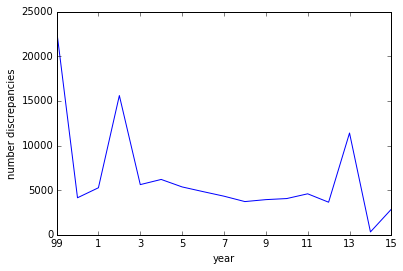

In [38]:
# number of discrepancies over time
dis_graph.plot.line()
plt.ylabel('number discrepancies')
plt.xlabel('year')
plt.show()

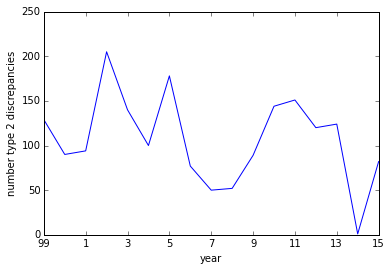

In [39]:
# number of type2 discrepancies over time
type2_graph.plot.line()
plt.ylabel('number type 2 discrepancies')
plt.xlabel('year')
plt.show()

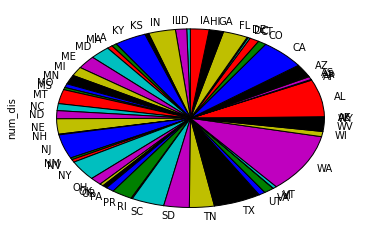

In [41]:
# pie plot of number of discrepancies by state
df_csch.groupby('LSTATE16')['num_dis'].sum().plot(kind = 'pie')
plt.show()

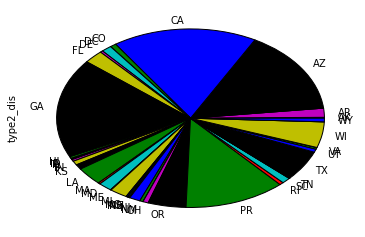

In [43]:
# pie plot of number of type2 discrepancies by state
df_csch.groupby('LSTATE16')['type2_dis'].sum().plot(kind = 'pie')
plt.show()

Conclusions*

Looking solely on discrepancies in charter status between consecutive years, we see sizeable spikes between 1999-2000, 2002-2003, and 2013-2014 attributed to change from m/n status to 'yes' or 'no'(or vice versa). Specifically, looking at type2 changes from 'yes' to 'no'(or vice versa) we see possible spikes in status changes around 2002, 2005, and 2011. Discrepancies from 2014-2016 were generally low. The 4 states with the largest discrepancies were WA, AL, CA, and TX (mostly due to type 1 discrepancies). The 4 states with a disproportionate number of type2 discrepancies were CA, GA, PR, and AZ. The results should also be taken with a grain of salt because they are not isolated from variation in availability of data from state to state.

*Discrepancies were determined between pairs of consecutive years only. A better analysis could involve looking at the "charter_history" column I created containing a list of charter statuses when the information was available, looking for sizeable streaks of 'yes' or 'no' charter status, and looking for the years the streak ended.